# 深度学习中的正则化策略综述

## 引言

数据科学专家面临的最常见问题之一是如何避免过拟合。 你是否遇到过模型在训练数据上表现特别好，却无法预测测试数据的情形？ 或者你在公共排行榜比赛中刚开始名列前茅，但在最终却落后数百个名额？

仅靠避免过拟合就可以提升模型性能。

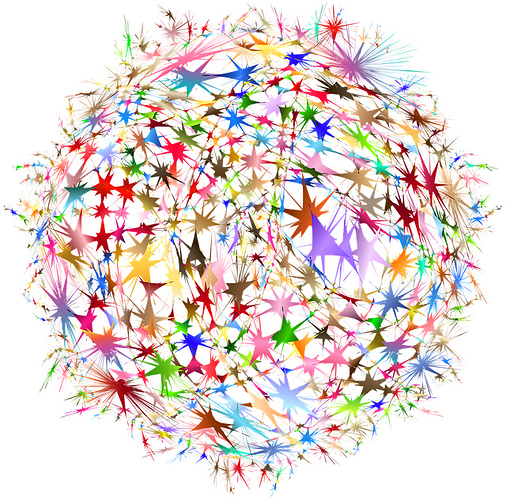

在本文中，你将理解过拟合的概念以及如何采用正规化来克服这一问题。 然后，我将介绍几种不同的正则化技术，并使用Python进行案例研究，以进一步巩固这些概念。

*注意：本文假设你已经掌握神经网络及使用keras实现的基本知识。 如果没有，你可以先参考下面的文章：*

* [Fundamentals of Deep Learning – Starting with Artificial Neural Network](https://www.analyticsvidhya.com/blog/2016/03/introduction-deep-learning-fundamentals-neural-networks/)
* [Tutorial: Optimizing Neural Networks using Keras (with Image recognition case study)](https://www.analyticsvidhya.com/blog/2016/10/tutorial-optimizing-neural-networks-using-keras-with-image-recognition-case-study/)

## 什么是正则化？

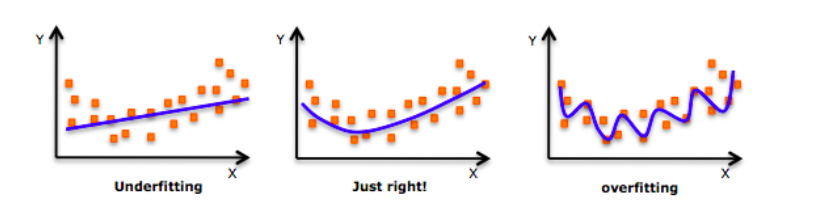

你之前是否看过这个张图？从左到右，模型试图很好地学习训练数据中的细节和噪声，最终导致在未知数据表现不佳。换句话说，在向右移动时，模型的复杂性增加，训练误差减少，但测试误差却不会，如下图所示。

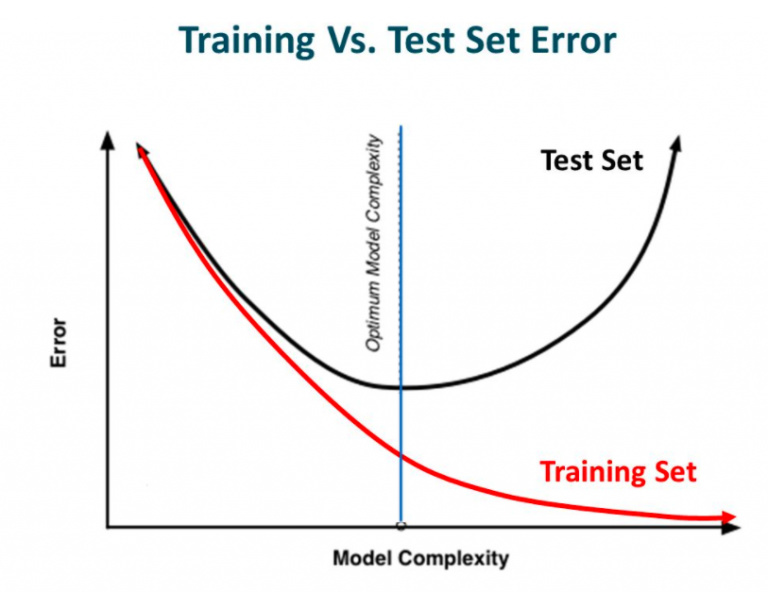

如果你已经设计过神经网络模型，那么你知道其比较复杂，这使得它们很容易过拟合。

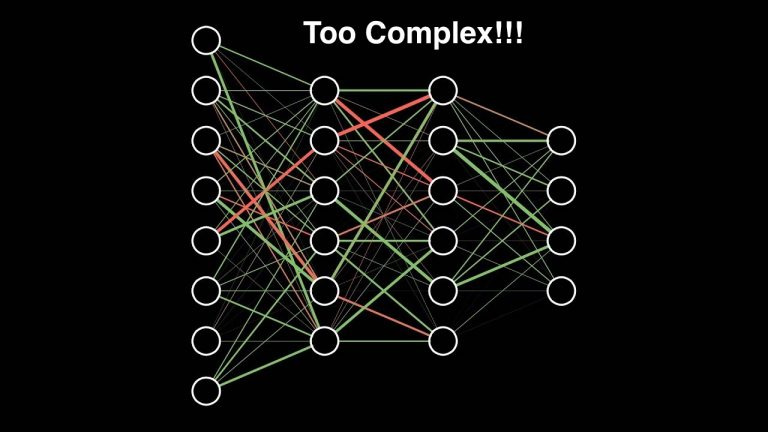

正则化通过对学习算法进行微调以使得该模型更好地泛化，这反过来也改善了模型在未知数据上的表现。

## 正则化为什么有助于降低过拟合？

如下图所示，一个神经网络模型在训练样本上是过拟合的。

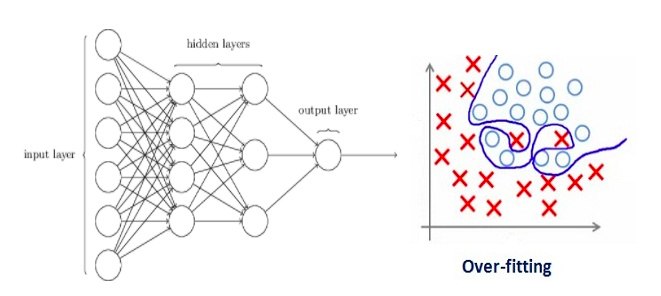

如果你已经学习过机器学习上的正则化概念，你知道它是惩罚系数。在深度学习中，它是惩罚每个节点的权重矩阵。假定我们的正则化系数很大以至于权重矩阵的一部分元素为0。

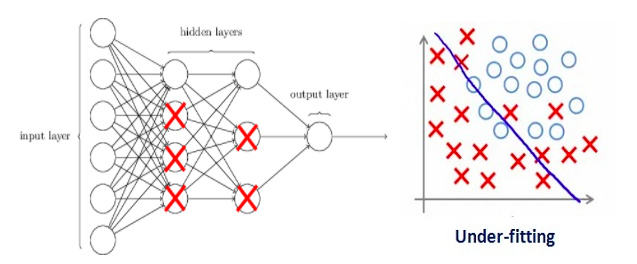

这将导致最终的模型为一个简单线性网络，并且可能会在训练样本上是欠拟合。因此，如此大的正则化系数是没有用的，我们需要一个合适的正则化系数，它正好得到一个如下图所示的泛化模型：

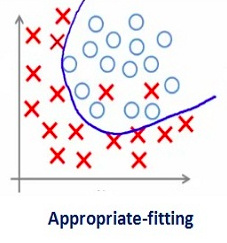

## 深度学习中的正则化策略

现在我们已经理解正规化如何帮助减少过拟合。为了将正则化应用于深度学习，这里介绍一些不同的正则化技巧

### L2 & L1 正则化

L1和L2是最常见的正则化方法。它们在损失函数（cost function）中增加一个正则项：

<img src="https://www.zhihu.com/equation?tex=Cost+function+%3D+Loss+%28say%2C+binary%5C_+crossentropy%29+%2B+Regularization%5C_+term" alt="Cost function = Loss (say, binary_ crossentropy) + Regularization_ term" width="" height="">

由于添加了这个正则化项，权重矩阵的值减小，因为它假定具有更小权重矩阵的神经网络导致更简单的模型。 因此，它也会在一定程度上减少过拟合。然而，这个正则化项在L1和L2中是不同的。

对于L2：
<img src="https://www.zhihu.com/equation?tex=%5C%5CCost+function+%3D+Loss+%2B+%5Cfrac%7B%5Clambda%7D%7B2m%7D%5Csum%7B%5C%7Cw%5C%7C%5E2%7D" alt="\Cost function = Loss + \frac{\lambda}{2m}\sum{|w|^2}" width="" height="">

这里， $\lambda$ 是正则化参数。它是一个需要优化的超参数。L2正则化又称为权重衰减（weight decay，从梯度下降的角度）因为其导致权重趋向于0（但不全是0）。

对于L1：

<img src="https://www.zhihu.com/equation?tex=%5C%5C+Cost+function+%3D+Loss+%2B+%5Cfrac%7B%5Clambda%7D%7B2m%7D%5Csum%7B%5C%7Cw%5C%7C%7D" alt="\ Cost function = Loss + \frac{\lambda}{2m}\sum{|w|}" width="" height="">

这里，我们惩罚权重矩阵的绝对值。不同于L2，权重值可能被减少到0.因此，L1对于压缩模型很有用。其它情况下，一般选择优先选择L2正则化。

在_Keras_中，我们使用[regularizers模块](https://keras.io/regularizers/)来在某个层上应用L1或者L2正则化。下面是在Dense层应用L2正则化：

```python
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)
```

*注意：0.01是前面所说的 $\lambda$ 值，是需要进一步优化的超参数，可以使用网格搜索方法(grid-search) 来优化。*

同样地，我们也可以使用L1正则化，在后面的实例中会更详细地讲解。

### Dropout

这是最有趣的正规化技术之一。它可以实现非常好的结果，因此是深度学习领域中最常用的正则化技术。为了理解dropout，假设我们的神经网络结构类似于下面显示的那样：

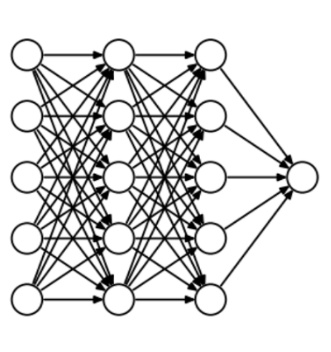

Dropout的原理很简单：在每个迭代过程中，随机选择某些节点，并且删除前向和后向连接，如下图所示：

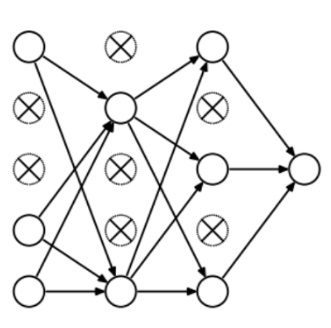

因此，每个迭代过程都会有不同的节点组合，从而导致不同的输出。这可以看成机器学习中的集成方法（ensemble technique）。集成模型一般优于单一模型，因为它们可以捕获更多的随机性。相似地，dropout使得神经网络模型优于正常的模型。

选择移除多少节点的概率值是一个超参数。如上图所示，dropout不仅可以应用在隐含层，也可以应用在输入层。

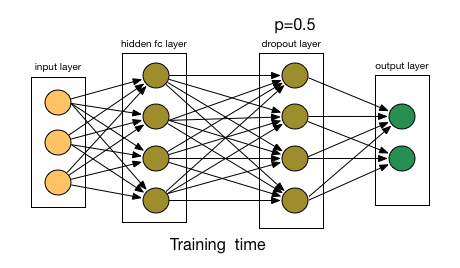

由于这些原因，当我们具有较大的神经网络时，通常首选dropout以引入更多的随机性。

在Keras中，我们可以使用[Dropout层](https://keras.io/layers/core/#dropout)实现dropout，代码如下：

```python
from keras.layers.core import Dropout

model = Sequential([Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'), 
                    Dropout(0.25), 
                    Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
                   ])
```

可以看到，dropout设置的丢弃概率值为0.25，这个值也可以采用网格搜索方法进一步优化。

### 数据扩增

减少过拟合的最简单方法是增加训练样本。在机器学习中，由于标注数据是昂贵的，我们不能够增加训练样本数量。但是对于图像问题，有几种可以增加训练样本的方法-旋转（rotaing）、翻转（flipping）、放缩（scaling）及平移（shfiting）等。下面为在MNIST数据集上的一些图像变换：

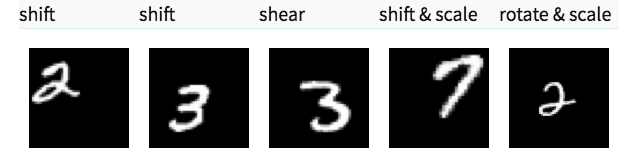

这种技术称为数据扩增（data agumentation），这通常可以极大提升模型的准确度。它一般被认为是必须要使用的方法来提升预测值。

在keras中，你可以使用[ImageDataGenerator](https://keras.io/preprocessing/image/)来实现上述的图像变换，它有很多参数来控制你预处理训练数据的方式。下面是一些样例代码：

```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True)
datagen.fit(train)
```

### 早期停止

早期停止（early stopping）是一种交叉验证策略，我们将一部分训练集作为验证集（validation set）。 当我们看到验证集的性能越来越差时，我们立即停止对该模型的训训。 这被称为早期停止。

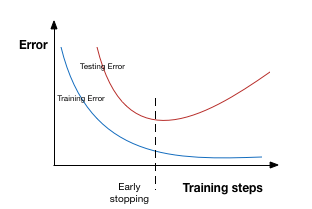

在上图中，我们在虚线处停止模型的训练，此时模型开始在训练数据上过拟合。

在Keras中，我们可以使用[callbacks函数](https://keras.io/callbacks/)实现早期停止，下面是样例代码：

```python
from keras.callbacks import EarlyStopping
    
EarlyStopping(monitor='val_err', patience=5)
```

上面，monitor参数表示监测量，这里val_err表示验证集误差。而patience参数epochs数量，当在这个过程性能无提升时会停止训练。为了更好地理解，让我们再看看上面的图片。 在虚线之后，每个epoch都会导致更高的验证集误差。 因此，虚线后5个epoch（patience等于5），模型将停止训练，因为没有进一步的改善。

*注意：在5个epochs（这是通常设置的patience值）之后，模型可能会再次开始改善，并且验证集误差也开始减少。 因此，我们需要在调整这个超参数时要多加小心。*

## 基于Keras的MNIST实例

至此，你已经对不同的正则化策略有了理论认识。下面，我们将使用这些知识来解决一个深度学习问题-手写字体识别，即MNIST数据集。Keras里面包含该数据集。首先，我们导入一些基本库。

In [ ]:
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

from matplotlib import pyplot

import tensorflow as tf
import keras

# 避免随机性，可以重复试验
seed = 128
rng = np.random.RandomState(seed)

然后加载数据集：

In [ ]:
# 加载数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

可视化一些图片：

In [ ]:
img_idx = rng.randint(len(train_images))
img = train_images[img_idx]
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

创建验证集以优化模型，这里使得训练集和验证集比率为7:3：

In [ ]:
train_images, train_labels = train_images[:50000], train_labels[:50000] # 使用部分数据
train_images = train_images.reshape((-1, 28*28)).astype(np.float32) / 255.0
test_images = test_images.reshape((-1, 28*28)).astype(np.float32) / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

split_size = int(len(train_images) * 0.7)
x_train, y_train = train_images[:split_size], train_labels[:split_size]
x_val, y_val = train_images[split_size:], train_labels[split_size:]

首先，我们创建一个包含5个隐含层的简单神经网络，隐含层神经元数为500。

In [ ]:
# 定义参数
    input_num_units = 784
    hidden1_num_units = 500
    hidden2_num_units = 500
    hidden3_num_units = 500
    hidden4_num_units = 500
    hidden5_num_units = 500
    output_num_units = 10

In [ ]:
epochs = 10
    batch_size = 128
    
    model = Sequential([
     Dense(hidden1_num_units, input_shape=(input_num_units,), activation='relu'),
     Dense(hidden2_num_units, activation='relu'),
     Dense(hidden3_num_units, activation='relu'),
     Dense(hidden4_num_units, activation='relu'),
     Dense(hidden5_num_units, activation='relu'),
     Dense(output_num_units, activation='softmax'),]
      )

然后我们训练10个epochs，可以看到模型性能：

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
trained_model_5d = model.fit(x_train, y_train, 
                             batch_size=batch_size, 
                             epochs=epochs, 
                             verbose=2, 
                             validation_data=(x_val, y_val))

然后，我们加上L2正则化，看看模型是否比原始模型有提升：

In [ ]:
reg_w = 1e-4

model = Sequential([
 Dense(hidden1_num_units, input_shape=(input_num_units,), activation='relu', kernel_regularizer=regularizers.l2(reg_w)),
 Dense(hidden2_num_units, activation='relu', kernel_regularizer=regularizers.l2(reg_w)),
 Dense(hidden3_num_units, activation='relu', kernel_regularizer=regularizers.l2(reg_w)),
 Dense(hidden4_num_units, activation='relu', kernel_regularizer=regularizers.l2(reg_w)),
 Dense(hidden5_num_units, activation='relu', kernel_regularizer=regularizers.l2(reg_w)),
 Dense(output_num_units, activation='softmax'),]
  )

上面我们采用的 $\lambda$ 值为0.0001，训练后模型准确度比原始模型高。

接着，尝试L1正则化：

In [ ]:
## l1

reg_w = 1e-4

model = Sequential([
 Dense(hidden1_num_units, input_shape=(input_num_units,), activation='relu', kernel_regularizer=regularizers.l1(reg_w)),
 Dense(hidden2_num_units, activation='relu', kernel_regularizer=regularizers.l1(reg_w)),
 Dense(hidden3_num_units, activation='relu', kernel_regularizer=regularizers.l1(reg_w)),
 Dense(hidden4_num_units, activation='relu', kernel_regularizer=regularizers.l1(reg_w)),
 Dense(hidden5_num_units, activation='relu', kernel_regularizer=regularizers.l1(reg_w)),
 Dense(output_num_units, activation='softmax'),]
  )

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

trained_model_5d = model.fit(x_train, y_train, 
                             batch_size=batch_size, 
                             epochs=epochs, 
                             verbose=2, 
                             validation_data=(x_val, y_val))

可以看到，使用L1正则化性能无提升。然后尝试dropout策略：

In [ ]:
## dropout

from keras.layers.core import Dropout
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(x_train, y_train, 
                             nb_epoch=epochs, 
                             batch_size=batch_size, 
                             validation_data=(x_test, y_test))

可以看到，dropout使用后模型性能有稍微提升。接着，尝试数据扩增技术：

In [ ]:
train_images = np.reshape(train_images, (-1, 28, 28, 1))
datagen = ImageDataGenerator(rotation_range=20)
datagen.fit(train_images, augment=True)

这里，采用rotation_range参数，它将以一定角度旋转图片，然后训练模型：

In [ ]:
model = Sequential([
 Dense(hidden1_num_units, input_shape=(input_num_units,), activation='relu'),
 Dense(hidden2_num_units, activation='relu'),
 Dense(hidden3_num_units, activation='relu'),
 Dense(hidden4_num_units, activation='relu'),
 Dense(hidden5_num_units, activation='relu'),
 Dense(output_num_units, activation='softmax'),]
  )

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=batch_size):
        x_batch = np.reshape(x_batch, (-1, 784)) / 255.0
        model.train_on_batch(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) // batch_size:
         # we need to break the loop by hand because
         # the generator loops indefinitely
         break

    results = model.evaluate(x_val.reshape(-1, 784), y_val, verbose=0, batch_size=batch_size)
    print(results)


使用数据扩增之后，性能有提升，你还可以尝试其它数据扩增方式。

最后，我们使用早期停止策略：

In [ ]:
model = Sequential([
 Dense(hidden1_num_units, input_shape=(input_num_units,), activation='relu'),
 Dense(hidden2_num_units, activation='relu'),
 Dense(hidden3_num_units, activation='relu'),
 Dense(hidden4_num_units, activation='relu'),
 Dense(hidden5_num_units, activation='relu'),
 Dense(output_num_units, activation='softmax'),]
  )

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

trained_model_5d = model.fit(x_train, y_train, 
                             batch_size=batch_size, 
                             epochs=epochs, 
                             verbose=2,
                             validation_data=(x_val, y_val), 
                             callbacks=[EarlyStopping(monitor="val_acc", patience=2)])

此时可以看到训练在第8个epoch就停止了，因为验证集准确度连续2个epochs没有提升。早期停止对训练较大的epochs时比较有效，你可以认为它是对训练的epochs数目进行优化。

## 结束语

我希望现在你对正规化以及在深度学习模型中不同正则化技术有了了解。我强烈建议你在处理深度学习任务时应用它，它将帮助你拓展视野并更好地理解这个技术。

*注：MNIST实例部分相比原文略有改动。*

选自《机器学习算法工程师》